<h1> Материалы курса "Анализ данных в инфромационной безопасности" </h1>

<h2> Ноутбук к презентации "Анализ данных"</h2>

<p>Андрей Скороходов, UDV Group</p>
<p>mail: andrei.skorokhodov@udv.group, telegram: @Spongillas</p>

## Pandas

In [1]:
import pandas as pd

In [11]:
pd.DataFrame({'column1': [11, 21, 31], 
              'column2': [12, 22, 32],
              'column3': [13, 23, 33]})

,column1,column2,column3
0,11,12,13
1,21,22,23
2,31,32,33


In [12]:
pd.DataFrame([[11, 12, 13], 
              [21, 22, 23],
              [31, 32, 33]],
            columns=['col1','col2','col3'])

,col1,col2,col3
0,11,12,13
1,21,22,23
2,31,32,33


In [14]:
pd.Series(range(5), 
          index=['id1','id2','id3','id4','id5'])

id1    0
id2    1
id3    2
id4    3
id5    4
dtype: int64

In [17]:
import random

dict1 = {
    f"column{i}": [random.randint(0,100) for i in range(5)] for i in range(5)
}

df = pd.DataFrame(dict1, index=[f"row{i}" for i in range(5)])
df

,column0,column1,column2,column3,column4
row0,1,61,61,19,0
row1,64,17,17,4,71
row2,43,35,77,70,11
row3,96,90,5,94,71
row4,26,94,17,57,59


In [30]:
df.iloc[1,1], df.loc['row1','column1']

(17, 17)

In [31]:
df['column2']

row0    61
row1    17
row2    77
row3     5
row4    17
Name: column2, dtype: int64

In [33]:
df.loc['row1']

column0    64
column1    17
column2    17
column3     4
column4    71
Name: row1, dtype: int64

In [38]:
df.loc['row2':'row3', 'column1':'column3']

,column1,column2,column3
row2,35,77,70
row3,90,5,94


In [48]:
df[(df['column1']>40) & (df['column3']<60)]

,column0,column1,column2,column3,column4
row0,1,61,61,19,0
row4,26,94,17,57,59


In [49]:
df.query("column1 > 40 and column3 < 60")

,column0,column1,column2,column3,column4
row0,1,61,61,19,0
row4,26,94,17,57,59


In [52]:
df['column3']<60

row0     True
row1     True
row2    False
row3    False
row4     True
Name: column3, dtype: bool

In [53]:
df['column1']>40

row0     True
row1    False
row2    False
row3     True
row4     True
Name: column1, dtype: bool

In [91]:
dict1 = {
    f"column{i}": [j+i*10 for j in range(5)] for i in range(5)
}

df = pd.DataFrame(dict1, index=[f"row{i}" for i in range(5)])
df

,column0,column1,column2,column3,column4
row0,0,10,20,30,40
row1,1,11,21,31,41
row2,2,12,22,32,42
row3,3,13,23,33,43
row4,4,14,24,34,44


In [92]:
df.loc['row1', 'column1'] = 10
df.iloc[1, 2] = 20
df.loc['row1', 'column1'], df.iloc[1, 2]

(10, 20)

In [93]:
df['column5'] = df['column4'] * 2
df['column6'] = range(df.shape[0])
df['column7'] = 99
df

,column0,column1,column2,column3,column4,column5,column6,column7
row0,0,10,20,30,40,80,0,99
row1,1,10,20,31,41,82,1,99
row2,2,12,22,32,42,84,2,99
row3,3,13,23,33,43,86,3,99
row4,4,14,24,34,44,88,4,99


In [94]:
df.loc['row5'] = df.loc['row4'] + 10
df.loc['row6'] = range(df.shape[1])
df.loc['row6'] = 99
df

,column0,column1,column2,column3,column4,column5,column6,column7
row0,0,10,20,30,40,80,0,99
row1,1,10,20,31,41,82,1,99
row2,2,12,22,32,42,84,2,99
row3,3,13,23,33,43,86,3,99
row4,4,14,24,34,44,88,4,99
row5,14,24,34,44,54,98,14,109
row6,99,99,99,99,99,99,99,99


In [95]:
df.drop(['column1', 'column2'], axis=1)
df.drop(['row2', 'row3'])

,column0,column1,column2,column3,column4,column5,column6,column7
row0,0,10,20,30,40,80,0,99
row1,1,10,20,31,41,82,1,99
row4,4,14,24,34,44,88,4,99
row5,14,24,34,44,54,98,14,109
row6,99,99,99,99,99,99,99,99


In [96]:
import numpy as np

In [97]:
for _ in range(5):
    row = random.choice(df.index) 
    column = random.choice(df.columns)
    df.loc[row, column] = np.NaN
df

,column0,column1,column2,column3,column4,column5,column6,column7
row0,0.0,10,20,30,40,80.0,0.0,99.0
row1,1.0,10,20,31,41,82.0,NaN,99.0
row2,2.0,12,22,32,42,84.0,2.0,99.0
row3,3.0,13,23,33,43,86.0,3.0,99.0
row4,4.0,14,24,34,44,88.0,4.0,NaN
row5,14.0,24,34,44,54,98.0,NaN,109.0
row6,NaN,99,99,99,99,NaN,99.0,99.0


In [98]:
df.dropna()

,column0,column1,column2,column3,column4,column5,column6,column7
row0,0.0,10,20,30,40,80.0,0.0,99.0
row2,2.0,12,22,32,42,84.0,2.0,99.0
row3,3.0,13,23,33,43,86.0,3.0,99.0


In [99]:
df

,column0,column1,column2,column3,column4,column5,column6,column7
row0,0.0,10,20,30,40,80.0,0.0,99.0
row1,1.0,10,20,31,41,82.0,NaN,99.0
row2,2.0,12,22,32,42,84.0,2.0,99.0
row3,3.0,13,23,33,43,86.0,3.0,99.0
row4,4.0,14,24,34,44,88.0,4.0,NaN
row5,14.0,24,34,44,54,98.0,NaN,109.0
row6,NaN,99,99,99,99,NaN,99.0,99.0


In [102]:
df[['column1','column2']].apply(lambda x: x%2)

,column1,column3
row0,0,0
row1,0,1
row2,0,0
row3,1,1
row4,0,0
row5,0,0
row6,1,1


In [107]:
def some_function(element_df, a):
    return element_df - a

df.apply(some_function, args=(10,))

,column0,column1,column2,column3,column4,column5,column6,column7
row0,-10.0,0,10,20,30,70.0,-10.0,89.0
row1,-9.0,0,10,21,31,72.0,NaN,89.0
row2,-8.0,2,12,22,32,74.0,-8.0,89.0
row3,-7.0,3,13,23,33,76.0,-7.0,89.0
row4,-6.0,4,14,24,34,78.0,-6.0,NaN
row5,4.0,14,24,34,44,88.0,NaN,99.0
row6,NaN,89,89,89,89,NaN,89.0,89.0


In [109]:
df.sort_values('column6', ascending=False)

,column0,column1,column2,column3,column4,column5,column6,column7
row6,NaN,99,99,99,99,NaN,99.0,99.0
row4,4.0,14,24,34,44,88.0,4.0,NaN
row3,3.0,13,23,33,43,86.0,3.0,99.0
row2,2.0,12,22,32,42,84.0,2.0,99.0
row0,0.0,10,20,30,40,80.0,0.0,99.0
row1,1.0,10,20,31,41,82.0,NaN,99.0
row5,14.0,24,34,44,54,98.0,NaN,109.0


In [110]:
df.sort_index(ascending=False)

,column0,column1,column2,column3,column4,column5,column6,column7
row6,NaN,99,99,99,99,NaN,99.0,99.0
row5,14.0,24,34,44,54,98.0,NaN,109.0
row4,4.0,14,24,34,44,88.0,4.0,NaN
row3,3.0,13,23,33,43,86.0,3.0,99.0
row2,2.0,12,22,32,42,84.0,2.0,99.0
row1,1.0,10,20,31,41,82.0,NaN,99.0
row0,0.0,10,20,30,40,80.0,0.0,99.0


In [115]:
dict1 = {
    f"column{i}": [f"A{j+i*10}" for j in range(3)] for i in range(3)
}

df_A = pd.DataFrame(dict1, index=[f"row{i}" for i in range(3)])
df_A

,column0,column1,column2
row0,A0,A10,A20
row1,A1,A11,A21
row2,A2,A12,A22


In [121]:
dict1 = {
    f"column{i}": [f"B{j+i*10}" for j in range(4)] for i in range(4)
}

df_B = pd.DataFrame(dict1, index=[f"row{i}" for i in range(4)])
df_B

,column0,column1,column2,column3
row0,B0,B10,B20,B30
row1,B1,B11,B21,B31
row2,B2,B12,B22,B32
row3,B3,B13,B23,B33


In [122]:
pd.concat([df_A, df_B])

,column0,column1,column2,column3
row0,A0,A10,A20,NaN
row1,A1,A11,A21,NaN
row2,A2,A12,A22,NaN
row0,B0,B10,B20,B30
row1,B1,B11,B21,B31
row2,B2,B12,B22,B32
row3,B3,B13,B23,B33


In [123]:
pd.concat([df_A, df_B], axis=1)

,column0,column1,column2,column0,column1,column2,column3
row0,A0,A10,A20,B0,B10,B20,B30
row1,A1,A11,A21,B1,B11,B21,B31
row2,A2,A12,A22,B2,B12,B22,B32
row3,NaN,NaN,NaN,B3,B13,B23,B33


In [124]:
df_A.merge(df_B, left_index=True, right_index=True)

,column0_x,column1_x,column2_x,column0_y,column1_y,column2_y,column3
row0,A0,A10,A20,B0,B10,B20,B30
row1,A1,A11,A21,B1,B11,B21,B31
row2,A2,A12,A22,B2,B12,B22,B32


In [439]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

In [440]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [130]:
df.describe() # описание всего датасета

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
df['age'].mean(), df['age'].min(), df['age'].max()

(29.69911764705882, 0.42, 80.0)

In [132]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [133]:
df['pclass'].nunique()

3

In [134]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [138]:
df.groupby('pclass')[['fare', 'age']].mean()

,fare,age
pclass,,
1,84.154687,38.233441
2,20.662183,29.877630
3,13.675550,25.140620


In [148]:
(df
 .groupby(['pclass', 'who'])[['fare', 'age']]
 .agg(['min', 'mean', 'max'])
 .round(2)
)

fare                    age             
                min    mean     max    min   mean   max
pclass who                                             
1      child  81.86  139.38  211.34   0.92   7.82  15.0
       man     0.00   65.95  512.33  17.00  42.38  80.0
       woman  25.93  104.32  512.33  16.00  35.50  63.0
2      child  14.50   28.32   41.58   0.67   4.54  14.0
       man     0.00   19.05   73.50  16.00  33.59  70.0
       woman  10.50   20.87   65.00  17.00  32.18  57.0
3      child   7.22   23.22   46.90   0.42   6.82  15.0
       man     0.00   11.34   69.55  16.00  29.00  74.0
       woman   6.75   15.35   69.55  16.00  27.85  63.0

In [163]:
df1 = df[['sex', 'class', 'who', 'embark_town', 'pclass']].copy()
df1

,sex,class,who,embark_town,pclass
0,male,Third,man,Southampton,3
1,female,First,woman,Cherbourg,1
2,female,Third,woman,Southampton,3
3,female,First,woman,Southampton,1
4,male,Third,man,Southampton,3
...,...,...,...,...,...
886,male,Second,man,Southampton,2
887,female,First,woman,Southampton,1
888,female,Third,woman,Southampton,3
889,male,First,man,Cherbourg,1


In [164]:
df1[df1['sex'].str.contains('fem')]

,sex,class,who,embark_town,pclass
1,female,First,woman,Cherbourg,1
2,female,Third,woman,Southampton,3
3,female,First,woman,Southampton,1
8,female,Third,woman,Southampton,3
9,female,Second,child,Cherbourg,2
...,...,...,...,...,...
880,female,Second,woman,Southampton,2
882,female,Third,woman,Southampton,3
885,female,Third,woman,Queenstown,3
887,female,First,woman,Southampton,1


In [165]:
df1['sex'].str.upper()

0        MALE
1      FEMALE
2      FEMALE
3      FEMALE
4        MALE
        ...  
886      MALE
887    FEMALE
888    FEMALE
889      MALE
890      MALE
Name: sex, Length: 891, dtype: object

In [166]:
df1['sex'].str.count('e')

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: sex, Length: 891, dtype: int64

In [167]:
df1['new_feature'] = df['sex'].str.replace('e','*') + "_" + df['class'].str.lower()
df1

,sex,class,who,embark_town,pclass,new_feature
0,male,Third,man,Southampton,3,mal*_third
1,female,First,woman,Cherbourg,1,f*mal*_first
2,female,Third,woman,Southampton,3,f*mal*_third
3,female,First,woman,Southampton,1,f*mal*_first
4,male,Third,man,Southampton,3,mal*_third
...,...,...,...,...,...,...
886,male,Second,man,Southampton,2,mal*_second
887,female,First,woman,Southampton,1,f*mal*_first
888,female,Third,woman,Southampton,3,f*mal*_third
889,male,First,man,Cherbourg,1,mal*_first


## SciPy

In [171]:
from scipy import special
a = special.exp10(3)
print(a)
b = special.exp2(3)
print(b)
c = special.sindg(90)
print(c)
d = special.cosdg(45)
print(f"{d:.4f}")

1000.0
8.0
1.0
0.7071


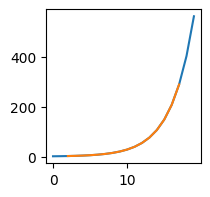

In [183]:
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.arange(0, 20)
y = np.exp(x/3.0)
f = interpolate.interp1d(x, y)
x1 = np.arange(2, 18)
y1 = f(x1)
plt.figure(figsize=(2,2))
plt.plot(x, y, x1, y1)
plt.show()

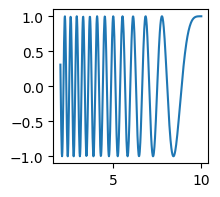

In [193]:
from scipy.signal import chirp
t = np.linspace(2, 10, 500)
w = chirp(t, f0=4, f1=2, t1=5, method='linear')
plt.figure(figsize=(2,2))
plt.plot(t, w)
plt.show()

In [195]:
from scipy import linalg
A = np.array([[10,11], [21,30]])
print(linalg.det(A)) # определитель
linalg.inv(A) # обратная матрица

69.0


array([[ 0.43478261, -0.15942029],
       [-0.30434783,  0.14492754]])

## Numpy

In [201]:
import numpy as np

a = np.array([[1,2], [3,4]])
print(type(a))
print(a)
print('ndim: \t', a.ndim)
print('shape: \t', a.shape)
print('size: \t', a.size)

<class 'numpy.ndarray'>
[[1 2]
 [3 4]]
ndim: 	 2
shape: 	 (2, 2)
size: 	 4


In [203]:
np.zeros((5, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [204]:
np.ones((5, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [208]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [211]:
np.ones((2,2,2))

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [225]:
arr = np.arange(1, 10)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [227]:
arr = arr.reshape(3,3)
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [244]:
print("1 элемент:",arr[1,2])
print("Слайс:\n",arr[:2, :2])
print("Другой слайс:\n", arr[:2, :])

1 элемент: 6
Слайс:
 [[1 2]
 [4 5]]
Другой слайс:
 [[1 2 3]
 [4 5 6]]


In [233]:
np.random.random(4)

array([0.69782672, 0.69732687, 0.27418132, 0.14383353])

In [237]:
np.array(arr.flat)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [261]:
arr1 = np.arange(1,10).reshape(3,3)
arr2 = np.arange(0,12).reshape(3,4)
print(arr1)
print(arr2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [264]:
arr1 + 10

array([[11, 12, 13],
       [14, 15, 16],
       [17, 18, 19]])

In [265]:
arr1 - 10

array([[-9, -8, -7],
       [-6, -5, -4],
       [-3, -2, -1]])

In [268]:
arr1 + arr2[:,:3]

array([[ 1,  3,  5],
       [ 8, 10, 12],
       [15, 17, 19]])

In [269]:
arr1 / 10

array([[0.1, 0.2, 0.3],
       [0.4, 0.5, 0.6],
       [0.7, 0.8, 0.9]])

In [270]:
arr2 * 2

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [271]:
arr1.dot(arr2)

array([[ 32,  38,  44,  50],
       [ 68,  83,  98, 113],
       [104, 128, 152, 176]])

In [272]:
np.cos(arr1)

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029],
       [ 0.75390225, -0.14550003, -0.91113026]])

In [274]:
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [277]:
np.sum(arr2)

66

In [278]:
np.sum(arr2, axis=0)

array([12, 15, 18, 21])

In [279]:
np.sum(arr2, axis=1)

array([ 6, 22, 38])

In [275]:
np.mean(arr2)

5.5

In [276]:
np.var(arr2) # дисперсия

11.916666666666666

In [280]:
np.std(arr2) # ст.отклонение

3.452052529534663

In [281]:
np.median(arr2)

5.5

In [282]:
arr1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [283]:
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [286]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  4,  5,  6,  7],
       [ 7,  8,  9,  8,  9, 10, 11]])

In [288]:
np.vstack((arr1, arr2[:,:3]))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [290]:
np.hsplit(arr2, 2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

## Matplotlib

In [291]:
import matplotlib.pyplot as plt

In [293]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


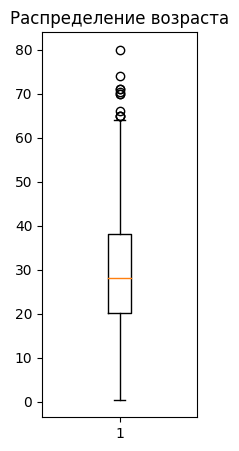

In [301]:
x = np.array(df['age'].dropna())
plt.figure(figsize=(2,5))
plt.boxplot(x)
plt.title('Распределение возраста')
plt.show()

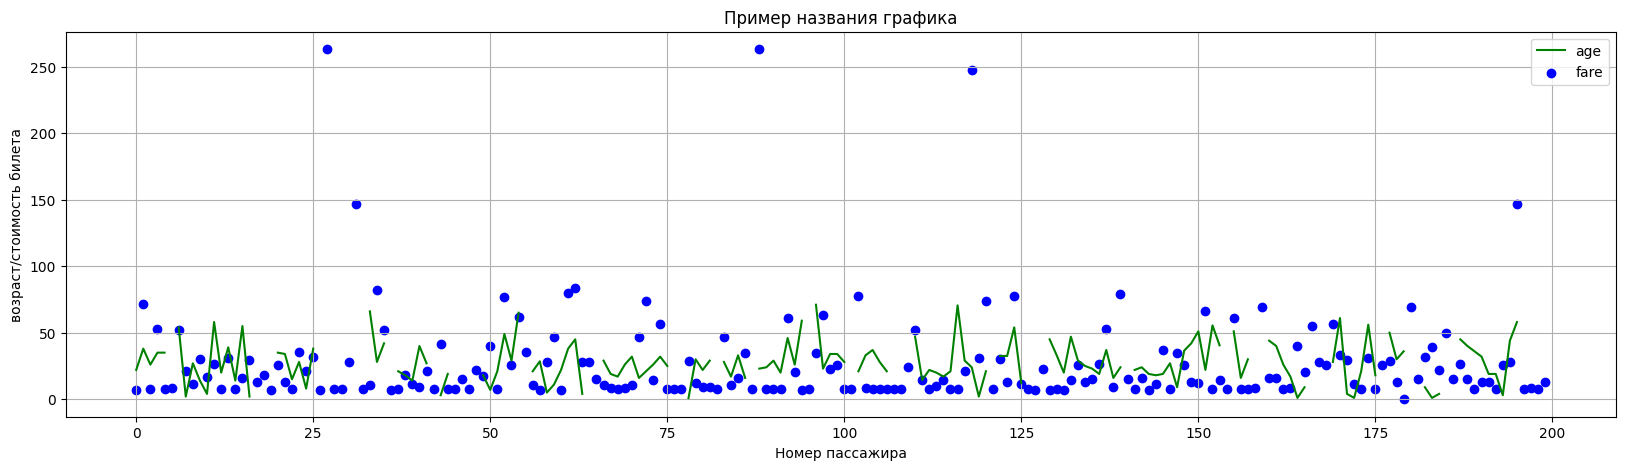

In [312]:
size = 200
age = np.array(df['age'][:size])
fare = np.array(df['fare'][:size])

plt.figure(figsize=(20,5)) # Изменение размера области построения графика
plt.title('Пример названия графика') # изменение заголовка
plt.plot(range(size),age, label='age', color='green') # линейный график
plt.scatter(range(size), fare, label='fare', color='blue') # точечный график
plt.xlabel('Номер пассажира') # подпись оси Х
plt.ylabel('возраст/стоимость билета') # подпись оси Y
plt.legend() # отобразить легенду
plt.grid() # отобразить сетку
plt.show() # скрыть служебные сообщения

In [360]:
df.groupby('sex')[['sibsp', 'survived']].sum()['sibsp']

sex
female    218
male      248
Name: sibsp, dtype: int64

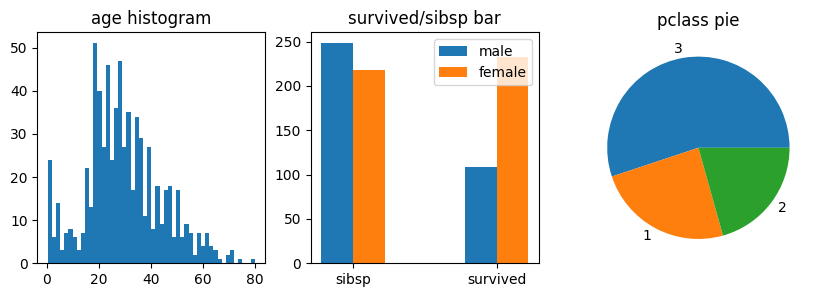

In [384]:
plt.figure(figsize=(10,3))

plt.subplot(1, 3, 1) # (кол-во строк,кол-во столбцов,ячейка)
plt.hist(df['age'], bins=50)
plt.title('age histogram')

plt.subplot(1, 3, 2)
sex = df.groupby('sex')[['sibsp', 'survived']].sum()
plt.bar([0.1, 1], sex.loc['male'], 0.2, label='male')
plt.bar([0.3, 1.2], sex.loc['female'], 0.2, label='female')
plt.xticks([0.2, 1.1], ['sibsp','survived'])
plt.title('survived/sibsp bar')
plt.legend()

plt.subplot(1, 3, 3)
pclass = df['pclass'].value_counts()
plt.pie(pclass.values, labels=pclass.index)
plt.title('pclass pie')

plt.show()

## Pandas plot

<Axes: >

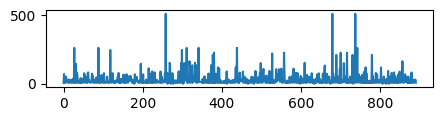

In [392]:
df.fare.plot(figsize=(5,1))

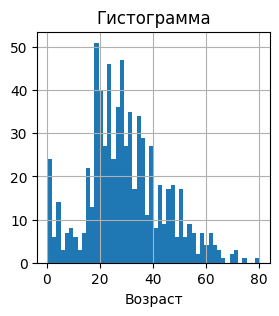

In [398]:
df['age'].hist(figsize=(3,3), bins=50)
plt.xlabel('Возраст')
plt.title('Гистограмма')
plt.show()

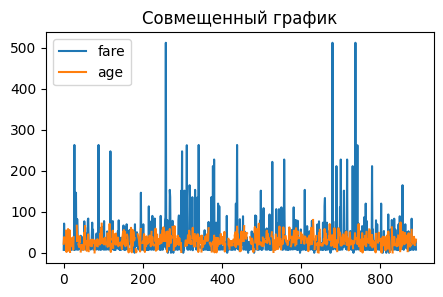

In [403]:
df[['fare', 'age']].plot(figsize=(5,3))
plt.title('Совмещенный график')
plt.show()

<Axes: >

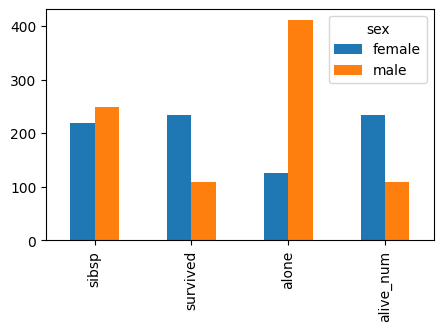

In [442]:
df['alive_num'] = df['alive']=='yes'
df.groupby('sex')[['sibsp', 'survived', 'alone', 'alive_num']].sum().T.plot.bar(figsize=(5,3))

## Seaborn

<Axes: xlabel='class', ylabel='survived'>

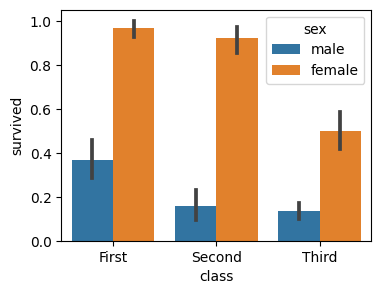

In [448]:
plt.figure(figsize=(4, 3)) 
sns.barplot(x="class", y="survived", hue="sex", data=df)

<Axes: ylabel='fare'>

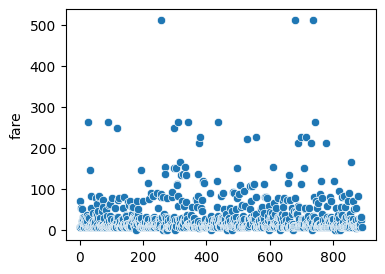

In [451]:
plt.figure(figsize=(4, 3)) 
sns.scatterplot(df['fare'])

<Axes: >

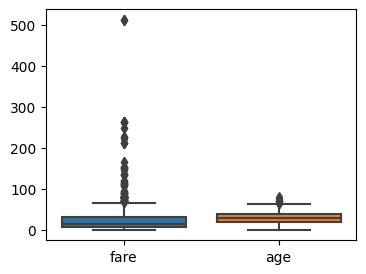

In [452]:
plt.figure(figsize=(4, 3)) 
sns.boxplot(df[['fare','age']])

<Axes: >

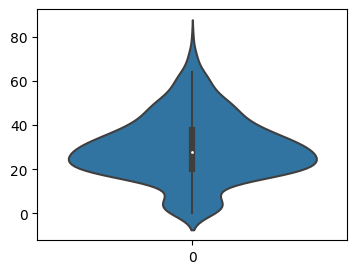

In [453]:
plt.figure(figsize=(4, 3)) 
sns.violinplot(df['age'])

<Axes: >

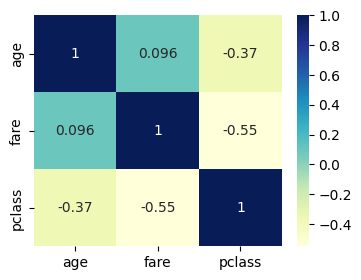

In [460]:
plt.figure(figsize=(4, 3)) 
sns.heatmap(df[['age','fare','pclass']].sort_values('age').corr(),
            cmap="YlGnBu",
            annot=True)

## Plotly, cufflinks

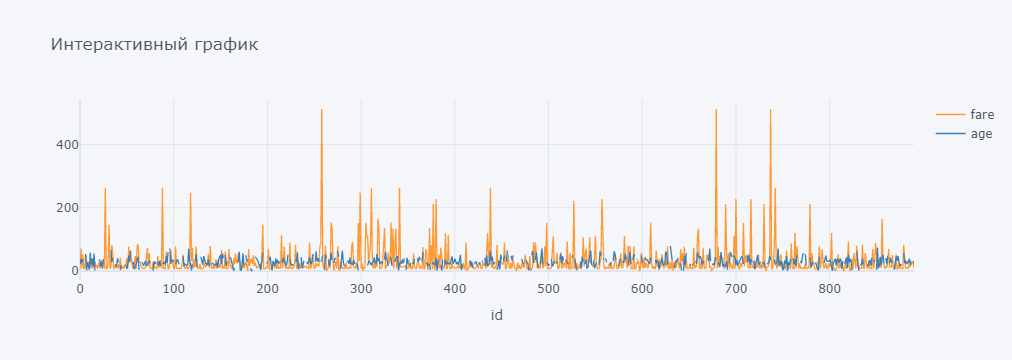

In [470]:
import cufflinks
df[['fare', 'age']].iplot(title='Интерактивный график', xTitle='id')